In [2]:
import pandas as pd
import numpy as np

svt_threshold = [10e-5, 10e-7, 10e-9, 10e-11]

data = []
for mech in  ["gaussian", "laplace"]:
    for t in svt_threshold:
        with open(f"result/{mech}_t_{t}_eps.log") as f:
            lines = f.readlines()
            for line in lines:
                eps_res = [mech, t]
                split = line.split(", ")
                for eps in split:
                    if "None" in eps:
                        eps_res.append(np.nan)
                    else:
                        eps_res.append(float(eps))
                data.append(eps_res)

df = pd.DataFrame(data=data, columns=["mech", "threshold", "Q1", "Q2", "Q3", "Q4", "Q5"])
df

,mech,threshold,Q1,Q2,Q3,Q4,Q5
0,gaussian,1.000000e-04,8.00,7.0,2.00,4.00,5.00
1,gaussian,1.000000e-04,6.00,8.0,2.00,10.00,5.00
2,gaussian,1.000000e-04,6.00,8.0,2.00,5.00,4.00
3,gaussian,1.000000e-04,0.70,8.0,0.60,9.00,4.00
4,gaussian,1.000000e-04,5.00,10.0,2.00,7.00,5.00
...,...,...,...,...,...,...,...
395,laplace,1.000000e-10,0.06,0.6,0.07,0.08,0.08
396,laplace,1.000000e-10,0.90,0.5,0.05,0.09,0.20
397,laplace,1.000000e-10,0.80,0.4,0.06,0.07,0.04
398,laplace,1.000000e-10,0.90,0.4,0.06,0.10,0.30


In [3]:
df = df.melt(id_vars=["mech", "threshold"], var_name="query", value_name="epsilon")
df

,mech,threshold,query,epsilon
0,gaussian,1.000000e-04,Q1,8.00
1,gaussian,1.000000e-04,Q1,6.00
2,gaussian,1.000000e-04,Q1,6.00
3,gaussian,1.000000e-04,Q1,0.70
4,gaussian,1.000000e-04,Q1,5.00
...,...,...,...,...
1995,laplace,1.000000e-10,Q5,0.08
1996,laplace,1.000000e-10,Q5,0.20
1997,laplace,1.000000e-10,Q5,0.04
1998,laplace,1.000000e-10,Q5,0.30


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# plt.rcParams['figure.dpi'] = 300
sns.set_theme(style="ticks", font="Times New Roman", font_scale=1.8)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

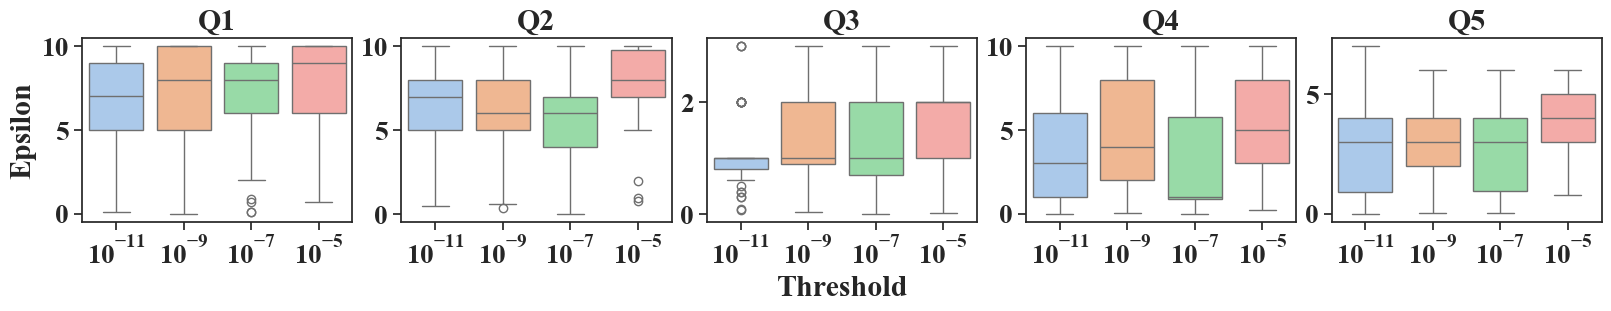

In [5]:
# plt.rcParams["figure.figsize"] = [16, 3]
fig, axes = plt.subplots(1, 5, figsize=(16,3), constrained_layout=True)

for i in range(5):
    data = df[(df["query"] == "Q" + str(i+1)) & (df["mech"] == "gaussian")]
    g = sns.boxplot(data=data, x="threshold", y="epsilon", hue="threshold", ax=axes[i], legend=False, palette="pastel")
    if i == 0:
        g.set(ylabel="Epsilon")
    else:
        g.set(ylabel=None)
    if i == 2:
        g.set(xlabel="Threshold")
    else:
        g.set(xlabel=None)
    
    axes[i].set_title("Q" + str(i+1), fontweight="bold")
    # g.set(xlabel="Q" + str(i+1))
    # _ = g.set(xlabel=None, ylabel="Epsilon")
    # _ = g.set_yticks([i for i in range(0, 11)])
    _ = g.set_xticks(g.get_xticks())
    _ = g.set_xticklabels([r"$\mathregular{10^{-11}}$", r"$\mathregular{10^{-9}}$", r"$\mathregular{10^{-7}}$", r"$\mathregular{10^{-5}}$"])


# plt.legend(fontsize='x-small', title_fontsize='x-small')
# g.legend_.set_title("Percentile")
# plt.subplots_adjust(wspace=0, hspace=0)
# plt.tight_layout()
plt.savefig("figures/vary_svt_threshold_gaussian.pdf", bbox_inches = 'tight')
plt.show()
plt.close()

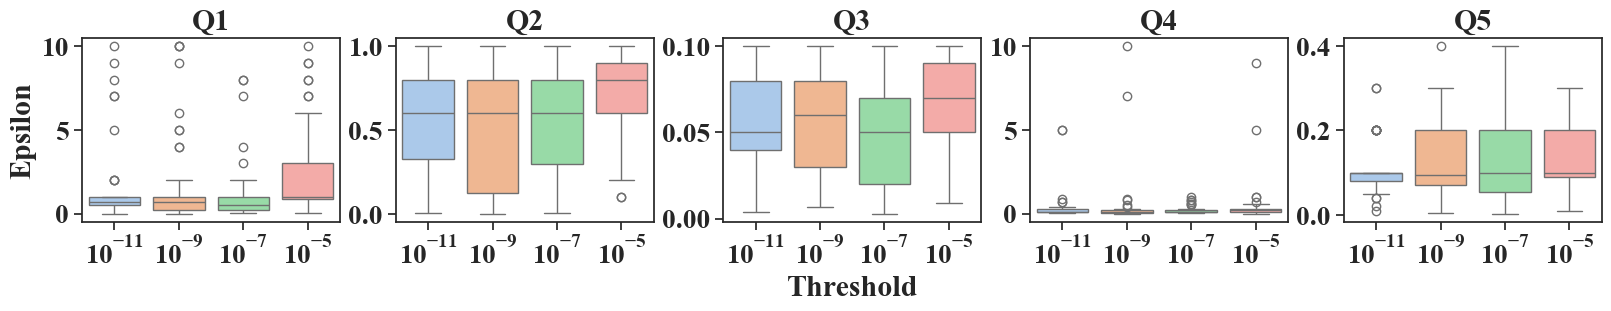

In [6]:
# plt.rcParams["figure.figsize"] = [16, 3]
fig, axes = plt.subplots(1, 5, figsize=(16,3), constrained_layout=True)

for i in range(5):
    data = df[(df["query"] == "Q" + str(i+1)) & (df["mech"] == "laplace")]
    g = sns.boxplot(data=data, x="threshold", y="epsilon", hue="threshold", ax=axes[i], legend=False, palette="pastel")
    if i == 0:
        g.set(ylabel="Epsilon")
    else:
        g.set(ylabel=None)
    if i == 2:
        g.set(xlabel="Threshold")
    else:
        g.set(xlabel=None)

    axes[i].set_title("Q" + str(i+1), fontweight="bold")
    # g.set(xlabel="Q" + str(i+1))
    # _ = g.set(xlabel=None, ylabel="Epsilon")
    # _ = g.set_yticks([i for i in range(0, 11)])
    _ = g.set_xticks(g.get_xticks())
    _ = g.set_xticklabels([r"$\mathregular{10^{-11}}$", r"$\mathregular{10^{-9}}$", r"$\mathregular{10^{-7}}$", r"$\mathregular{10^{-5}}$"])


# plt.legend(fontsize='x-small', title_fontsize='x-small')
# g.legend_.set_title("Percentile")
# plt.subplots_adjust(wspace=0, hspace=0)
# plt.tight_layout()
plt.savefig("figures/vary_svt_threshold_laplace.pdf", bbox_inches = 'tight')
plt.show()
plt.close()

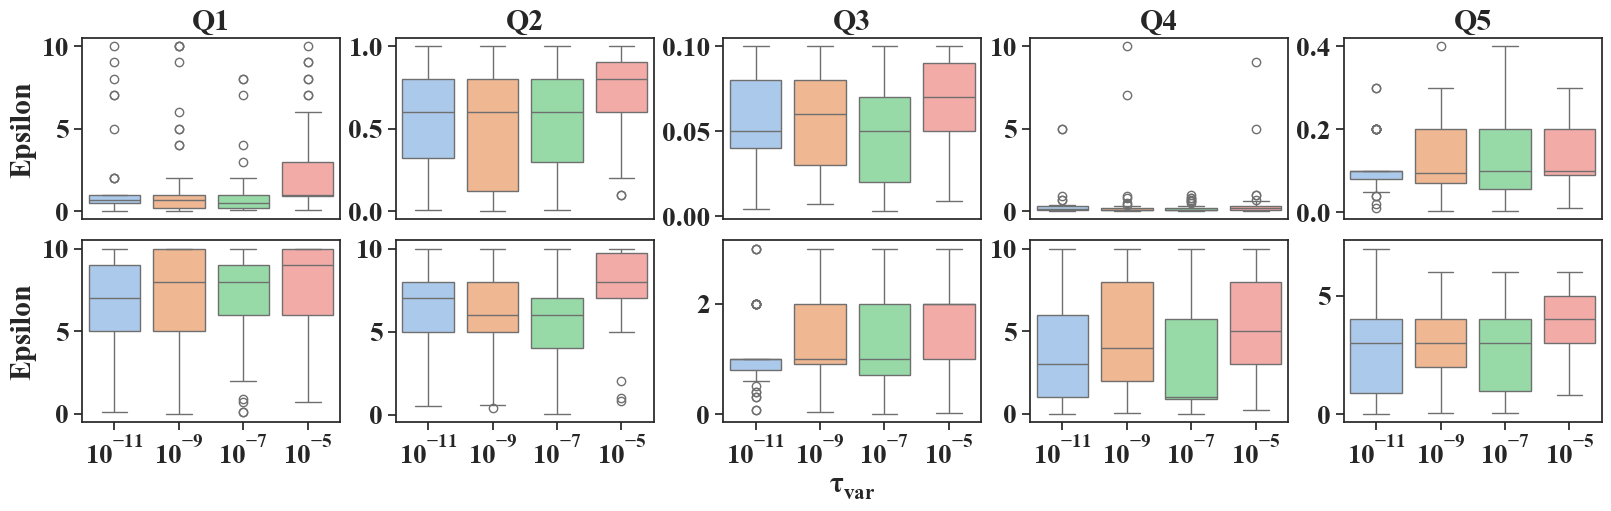

In [18]:
fig, axes = plt.subplots(2, 5, figsize=(16, 5), constrained_layout=True)

# Plot Laplace data on top
for i in range(5):
    data = df[(df["query"] == "Q" + str(i+1)) & (df["mech"] == "laplace")]
    g = sns.boxplot(data=data, x="threshold", y="epsilon", hue="threshold", ax=axes[0, i], legend=False, palette="pastel")
    if i == 0:
        g.set(ylabel="Epsilon")
    else:
        g.set(ylabel=None)
    g.set(xlabel=None)
    g.set_xticks([])
    axes[0, i].set_title("Q" + str(i+1), fontweight="bold")

# Plot Gaussian data on bottom
for i in range(5):
    data = df[(df["query"] == "Q" + str(i+1)) & (df["mech"] == "gaussian")]
    g = sns.boxplot(data=data, x="threshold", y="epsilon", hue="threshold", ax=axes[1, i], legend=False, palette="pastel")
    if i == 0:
        g.set(ylabel="Epsilon")
    else:
        g.set(ylabel=None)
    if i == 2:
        g.set(xlabel=r"$\mathregular{\tau_{var}}$")
    else:
        g.set(xlabel=None)
    _ = g.set_xticks(g.get_xticks())
    _ = g.set_xticklabels([r"$\mathregular{10^{-11}}$", r"$\mathregular{10^{-9}}$", r"$\mathregular{10^{-7}}$", r"$\mathregular{10^{-5}}$"])

plt.savefig("figures/vary_svt_threshold_stacked.pdf", bbox_inches='tight')
plt.show()
plt.close()
